In [1]:
import pandas as pd
import os
from alchemlyb.parsing import amber
from alchemlyb.estimators import TI,MBAR

In [2]:
os.chdir('./ligand/vdw_crg_repeat_3')
main_dir = os.getcwd()
file_list = [0.0, 0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [3]:
dHdl = pd.concat([amber.extract_dHdl(str(filename) + '/ti001.out', T=300) for filename in file_list])
u_nk_rm_rest = pd.concat([amber.extract_u_nk(str(filename) + '/ti001.out', T=300) for filename in file_list])

In [4]:
ti_estimator = TI().fit(dHdl)
mbar_estimator = MBAR().fit(u_nk_rm_rest)

In [5]:
delta_f = ti_estimator.delta_f_.iloc[0, -1]
d_delta_f = ti_estimator.d_delta_f_.iloc[0, -1]

In [6]:
print("TI:")
print("Free energy difference (TI)", delta_f, "kT")
print("Free energy difference (TI) error", d_delta_f, "kT")

TI:
Free energy difference (TI) 67.13546836901826 kT
Free energy difference (TI) error 0.23942085714407788 kT


Free energy difference (MBAR) 65.92771393262575 kT


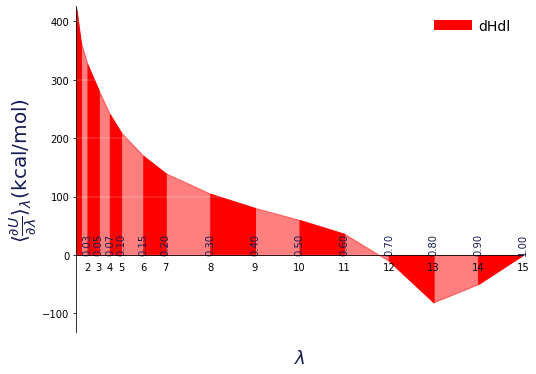

In [7]:
print("Free energy difference (MBAR)", mbar_estimator.delta_f_.loc[0.0, 1.0],'kT')
from alchemlyb.visualisation import plot_ti_dhdl,plot_mbar_overlap_matrix
ax = plot_ti_dhdl([ti_estimator], labels=['dHdl'], colors=['r'],units='kcal/mol')
ax.figure.savefig('onestep_dhdl_TI.pdf')

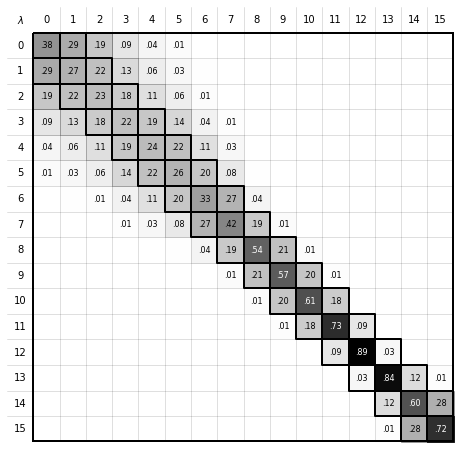

In [8]:
ax = plot_mbar_overlap_matrix(mbar_estimator.overlap_matrix)
ax.figure.savefig('onestep_MBAR.pdf', bbox_inches='tight', pad_inches=0.0)

In [9]:
import matplotlib.pyplot as plt
from alchemlyb.visualisation.dF_state import plot_dF_state

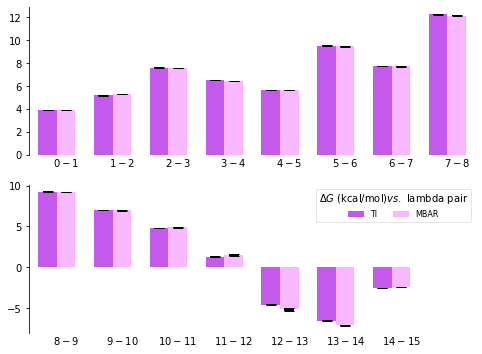

In [10]:
estimators = [(ti_estimator), (mbar_estimator)]

fig = plot_dF_state(estimators, orientation='portrait',units='kcal/mol')
fig.savefig('dF_state.pdf', bbox_inches='tight')

with open(f'{main_dir}/result.txt','w') as f:
    f.write(f'Free energy difference (TI):\t{delta_f * 0.596:0.3f} ± {d_delta_f * 0.596:0.3f} kcal/mol\n')
    f.write(f'Free energy difference (MBAR):\t{mbar_estimator.delta_f_.loc[0.0,1.0] * 0.596:0.3f} ± {mbar_estimator.d_delta_f_.loc[0.0,1.0] * 0.596:0.3f} kcal/mol\n')
    for i in range(len(file_list)-1):
        f.writelines(f'{mbar_estimator.delta_f_.loc[file_list[i],file_list[i+1]] * 0.596:.3f}\n')

In [11]:
delta_f

67.13546836901826

In [12]:
type(ti_estimator.delta_f_.iloc[0, -1])

numpy.float64

In [13]:
ti_estimator.delta_f_

,0.000,0.010,0.025,0.050,0.075,0.100,0.150,0.200,0.300,0.400,0.500,0.600,0.700,0.800,0.900,1.000
0.000,0.000000,3.930721,9.110817,16.713256,23.251527,28.888099,38.380939,46.123102,58.364303,67.634078,74.657271,79.469875,80.780027,76.214570,69.651834,67.135468
0.010,-3.930721,0.000000,5.180096,12.782535,19.320806,24.957378,34.450218,42.192381,54.433582,63.703357,70.726551,75.539154,76.849306,72.283849,65.721113,63.204748
0.025,-9.110817,-5.180096,0.000000,7.602439,14.140710,19.777282,29.270122,37.012285,49.253486,58.523261,65.546455,70.359058,71.669210,67.103753,60.541017,58.024652
0.050,-16.713256,-12.782535,-7.602439,0.000000,6.538271,12.174843,21.667683,29.409846,41.651047,50.920822,57.944016,62.756619,64.066771,59.501314,52.938578,50.422213
0.075,-23.251527,-19.320806,-14.140710,-6.538271,0.000000,5.636572,15.129411,22.871575,35.112775,44.382551,51.405744,56.218348,57.528500,52.963042,46.400307,43.883941
0.100,-28.888099,-24.957378,-19.777282,-12.174843,-5.636572,0.000000,9.492840,17.235003,29.476204,38.745979,45.769172,50.581776,51.891928,47.326471,40.763735,38.247369
0.150,-38.380939,-34.450218,-29.270122,-21.667683,-15.129411,-9.492840,0.000000,7.742164,19.983364,29.253139,36.276333,41.088936,42.399089,37.833631,31.270895,28.754530
0.200,-46.123102,-42.192381,-37.012285,-29.409846,-22.871575,-17.235003,-7.742164,0.000000,12.241200,21.510976,28.534169,33.346773,34.656925,30.091467,23.528732,21.012366
0.300,-58.364303,-54.433582,-49.253486,-41.651047,-35.112775,-29.476204,-19.983364,-12.241200,0.000000,9.269775,16.292969,21.105572,22.415725,17.850267,11.287531,8.771166
0.400,-67.634078,-63.703357,-58.523261,-50.920822,-44.382551,-38.745979,-29.253139,-21.510976,-9.269775,0.000000,7.023193,11.835797,13.145949,8.580492,2.017756,-0.498610


In [14]:
mbar_estimator.delta_f_

,0.000,0.010,0.025,0.050,0.075,0.100,0.150,0.200,0.300,0.400,0.500,0.600,0.700,0.800,0.900,1.000
0.000,0.000000,3.925188,9.193550,16.746277,23.185405,28.806433,38.256663,45.956489,58.049037,67.273003,74.262589,79.160145,80.640613,75.484481,68.359988,65.927714
0.010,-3.925188,0.000000,5.268362,12.821089,19.260218,24.881246,34.331475,42.031301,54.123849,63.347815,70.337401,75.234957,76.715426,71.559294,64.434800,62.002526
0.025,-9.193550,-5.268362,0.000000,7.552727,13.991856,19.612884,29.063114,36.762940,48.855488,58.079453,65.069040,69.966595,71.447064,66.290932,59.166438,56.734164
0.050,-16.746277,-12.821089,-7.552727,0.000000,6.439128,12.060156,21.510386,29.210212,41.302760,50.526726,57.516312,62.413868,63.894336,58.738204,51.613711,49.181437
0.075,-23.185405,-19.260218,-13.991856,-6.439128,0.000000,5.621028,15.071258,22.771084,34.863632,44.087598,51.077184,55.974740,57.455208,52.299076,45.174583,42.742309
0.100,-28.806433,-24.881246,-19.612884,-12.060156,-5.621028,0.000000,9.450230,17.150056,29.242604,38.466569,45.456156,50.353711,51.834180,46.678048,39.553555,37.121281
0.150,-38.256663,-34.331475,-29.063114,-21.510386,-15.071258,-9.450230,0.000000,7.699826,19.792374,29.016340,36.005926,40.903482,42.383950,37.227818,30.103325,27.671051
0.200,-45.956489,-42.031301,-36.762940,-29.210212,-22.771084,-17.150056,-7.699826,0.000000,12.092548,21.316514,28.306100,33.203656,34.684124,29.527992,22.403499,19.971225
0.300,-58.049037,-54.123849,-48.855488,-41.302760,-34.863632,-29.242604,-19.792374,-12.092548,0.000000,9.223966,16.213552,21.111108,22.591576,17.435444,10.310951,7.878677
0.400,-67.273003,-63.347815,-58.079453,-50.526726,-44.087598,-38.466569,-29.016340,-21.316514,-9.223966,0.000000,6.989586,11.887142,13.367611,8.211478,1.086985,-1.345289


In [15]:
mbar_estimator.delta_f_.iloc[0,-1] * 0.6

39.55662835957545